# MACHINE LEARNING FOR FINANCE

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#item1">CHAPTER 1 - Explore the data with some EDA</a>

2. <a href="#item2">CHAPTER 2 - Machine learning tree methods</a>

3. <a href="#item3">CHAPTER 3 - Neural networks and KNN</a>
    
4. <a href="#item3">CHAPTER 4 - Modern portfolio theory (MPT); efficient frontiers</a>
   
</font>
</div>

In [1]:
import pandas as pd

In [2]:
!conda install -c quantopian ta-lib --yes

Solving environment: done

# All requested packages already installed.



In [3]:
lng = pd.read_csv("LNG.csv", index_col=0)

In [4]:
spy = pd.read_csv("SPY.csv", index_col=0)

In [5]:
lng.head()

,Adj_Close,Adj_Volume
Date,,
1994-04-04,72.0,0.0
1994-04-05,108.0,0.0
1994-04-06,108.0,0.0
1994-04-07,108.0,0.0
1994-04-08,108.0,0.0


In [6]:
lng_df = lng['2016-04-15':'2018-04-10']

In [7]:
lng_df

,Adj_Close,Adj_Volume
Date,,
2016-04-15,37.13,4293775.0
2016-04-18,36.90,3445852.0
2016-04-19,37.12,3748050.0
2016-04-20,37.77,2470384.0
2016-04-21,37.21,2043988.0
...,...,...
2018-04-04,54.30,1816771.0
2018-04-05,56.21,2533635.0
2018-04-06,54.36,1754446.0


In [8]:
spy_df = spy['2016-04-15':'2018-04-10']

In [9]:
spy_df

,Adj_Close,Adj_Volume
Date,,
2016-04-15,199.760673,75761600.0
2016-04-18,201.164330,75277700.0
2016-04-19,201.798846,88316100.0
2016-04-20,201.991139,81100300.0
2016-04-21,200.904747,85695000.0
...,...,...
2018-04-04,263.560000,123574054.0
2018-04-05,265.640000,80993290.0
2018-04-06,259.720000,179483634.0


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<a id='item1'></a>

# CHAPTER 1 - Explore the data with some EDA

First, let's explore the data. Any time we begin a machine learning (ML) project, we need to first do some exploratory data analysis (EDA) to familiarize ourselves with the data. This includes things like:

    raw data plots
    histograms
    and more...

I typically begin with raw data plots and histograms. This allows us to understand our data's distributions. If it's a normal distribution, we can use things like parametric statistics.

There are two stocks loaded for you into pandas DataFrames: lng_df and spy_df (LNG and SPY). Take a look at them with .head(). We'll use the closing prices and eventually volume as inputs to ML algorithms.

Note: We'll call plt.clf() each time we want to make a new plot, or f = plt.figure().

In [11]:
import matplotlib.pyplot as plt

In [12]:
print(lng_df.head())  # examine the DataFrames
print(spy_df.head())  # examine the SPY DataFrame

            Adj_Close  Adj_Volume
Date                             
2016-04-15      37.13   4293775.0
2016-04-18      36.90   3445852.0
2016-04-19      37.12   3748050.0
2016-04-20      37.77   2470384.0
2016-04-21      37.21   2043988.0
             Adj_Close  Adj_Volume
Date                              
2016-04-15  199.760673  75761600.0
2016-04-18  201.164330  75277700.0
2016-04-19  201.798846  88316100.0
2016-04-20  201.991139  81100300.0
2016-04-21  200.904747  85695000.0


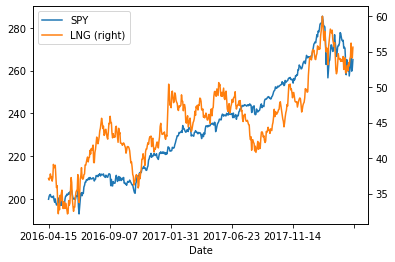

In [13]:
# Plot the Adj_Close columns for SPY and LNG
spy_df['Adj_Close'].plot(label='SPY', legend=True)
lng_df['Adj_Close'].plot(label='LNG', legend=True, secondary_y=True)
plt.show()  # show the plot

In [14]:
plt.clf()  # clear the plot space

<Figure size 432x288 with 0 Axes>

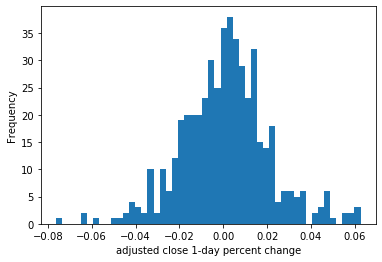

In [15]:
# Histogram of the daily price change percent of Adj_Close for LNG
lng_df['Adj_Close'].pct_change().plot.hist(bins=50)
plt.xlabel('adjusted close 1-day percent change')
plt.show()

## Correlations

Correlations are nice to check out before building machine learning models, because we can see which features correlate to the target most strongly. Pearson's correlation coefficient is often used, which only detects linear relationships. It's commonly assumed our data is normally distributed, which we can "eyeball" from histograms. Highly correlated variables have a Pearson correlation coefficient near 1 (positively correlated) or -1 (negatively correlated). A value near 0 means the two variables are not linearly correlated.

If we use the same time periods for previous price changes and future price changes, we can see if the stock price is mean-reverting (bounces around) or trend-following (goes up if it has been going up recently).

In [16]:
# Create 5-day % changes of Adj_Close for the current day, and 5 days in the future
lng_df['5d_future_close'] = lng_df['Adj_Close'].shift(-5)
lng_df['5d_close_future_pct'] = lng_df['5d_future_close'].pct_change(5)
lng_df['5d_close_pct'] = lng_df['Adj_Close'].pct_change(5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [17]:
lng_df

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct
Date,,,,,
2016-04-15,37.13,4293775.0,37.40,NaN,NaN
2016-04-18,36.90,3445852.0,36.75,NaN,NaN
2016-04-19,37.12,3748050.0,37.25,NaN,NaN
2016-04-20,37.77,2470384.0,39.11,NaN,NaN
2016-04-21,37.21,2043988.0,38.62,NaN,NaN
...,...,...,...,...,...
2018-04-04,54.30,1816771.0,NaN,0.024494,0.023370
2018-04-05,56.21,2533635.0,NaN,-0.010318,0.074761
2018-04-06,54.36,1754446.0,NaN,0.023363,0.017025


In [18]:
# Calculate the correlation matrix between the 5d close pecentage changes (current and future)
corr = lng_df[['5d_close_pct', '5d_close_future_pct']].corr()
print(corr)

                     5d_close_pct  5d_close_future_pct
5d_close_pct             1.000000            -0.164861
5d_close_future_pct     -0.164861             1.000000


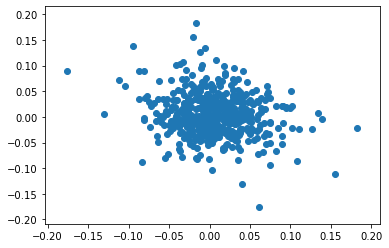

In [19]:
# Scatter the current 5-day percent change vs the future 5-day percent change
plt.scatter(lng_df['5d_close_pct'], lng_df['5d_close_future_pct'])
plt.show()

## Create moving average and RSI features

We want to add historical data to our machine learning models to make better predictions, but adding lots of historical time steps is tricky. Instead, we can condense information from previous points into a single timestep with indicators.

A moving average is one of the simplest indicators - it's the average of previous data points. This is the function talib.SMA() from the TAlib library.

Another common technical indicator is the relative strength index (RSI). This is defined by:

RSI = 100 − (100/1+RS)

R S= average gain over n periods / average loss over n periods

The n periods is set in talib.RSI() as the timeperiod argument.

A common period for RSI is 14, so we'll use that as one setting in our calculations.

In [20]:
feature_names = ['5d_close_pct']  # a list of the feature names for later

In [21]:
import talib


In [22]:
# Create moving averages and rsi for timeperiods of 14, 30, 50, and 200
for n in [14,30,50,200]:

    # Create the moving average indicator and divide by Adj_Close
    lng_df['ma' + str(n)] = talib.SMA(lng_df['Adj_Close'].values,
                              timeperiod=n) / lng_df['Adj_Close']
    # Create the RSI indicator
    lng_df['rsi' + str(n)] = talib.RSI(lng_df['Adj_Close'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n), 'rsi' + str(n)]
    
print(feature_names)

['5d_close_pct', 'ma14', 'rsi14', 'ma30', 'rsi30', 'ma50', 'rsi50', 'ma200', 'rsi200']


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Create features and targets

We almost have features and targets that are machine-learning ready -- we have features from current price changes (5d_close_pct) and indicators (moving averages and RSI), and we created targets of future price changes (5d_close_future_pct). Now we need to break these up into separate numpy arrays so we can feed them into machine learning algorithms.

Our indicators also cause us to have missing values at the beginning of the DataFrame due to the calculations. We could backfill this data, fill it with a single value, or drop the rows. Dropping the rows is a good choice, so our machine learning algorithms aren't confused by any sort of backfilled or 0-filled data. Pandas has a .dropna() function which we will use to drop any rows with missing values.

In [23]:
# Drop all na values
lng_df = lng_df.dropna()

In [24]:
# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = lng_df[feature_names]
targets = lng_df['5d_close_future_pct']

In [25]:
# Create DataFrame from target column and feature columns
feature_and_target_cols = ['5d_close_future_pct'] + feature_names
feat_targ_df = lng_df[feature_and_target_cols]

In [26]:
# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

                     5d_close_future_pct  5d_close_pct      ma14     rsi14  \
5d_close_future_pct             1.000000     -0.047183  0.096373 -0.068888   
5d_close_pct                   -0.047183      1.000000 -0.827699  0.683973   
ma14                            0.096373     -0.827699  1.000000 -0.877566   
rsi14                          -0.068888      0.683973 -0.877566  1.000000   
ma30                            0.102744     -0.609573  0.848778 -0.964795   
rsi30                          -0.106279      0.518748 -0.713427  0.935711   
ma50                            0.113444     -0.475081  0.692689 -0.916540   
rsi50                          -0.138946      0.426045 -0.601849  0.845788   
ma200                           0.230860     -0.220690  0.346457 -0.551087   
rsi200                         -0.221029      0.284021 -0.416221  0.639057   

                         ma30     rsi30      ma50     rsi50     ma200  \
5d_close_future_pct  0.102744 -0.106279  0.113444 -0.138946  0.23086

In [27]:
import seaborn as sns

/home/jupyterlab/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Check the correlations

Before we fit our first machine learning model, let's look at the correlations between features and targets. Ideally we want large (near 1 or -1) correlations between features and targets. Examining correlations can help us tweak features to maximize correlation (for example, altering the timeperiod argument in the talib functions). It can also help us remove features that aren't correlated to the target.

To easily plot a correlation matrix, we can use seaborn's heatmap() function. This takes a correlation matrix as the first argument, and has many other options. Check out the annot option -- this will help us turn on annotations.

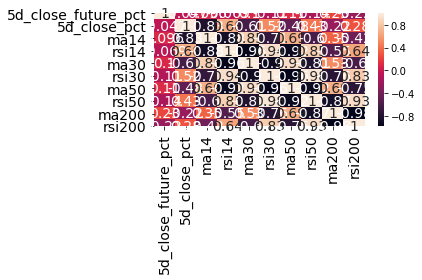

<Figure size 432x288 with 0 Axes>

In [28]:
# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True, annot_kws = {"size": 14})
plt.yticks(rotation=0, size = 14); plt.xticks(rotation=90, size = 14)  # fix ticklabel directions and size
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

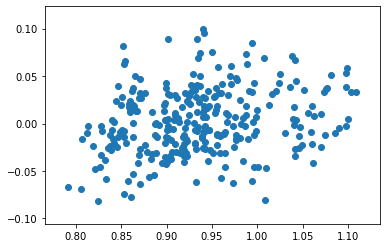

In [29]:
# Create a scatter plot of the most highly correlated variable with the target
plt.scatter(lng_df['ma200'], lng_df['5d_close_future_pct'])
plt.show()

## Create train and test features

Before we fit our linear model, we want to add a constant to our features, so we have an intercept for our linear model.

We also want to create train and test features. This is so we can fit our model to the train dataset, and evaluate performance on the test dataset. We always want to check performance on data the model has not seen to make sure we're not overfitting, which is memorizing patterns in the training data too exactly.

With a time series like this, we typically want to use the oldest data as our training set, and the newest data as our test set. This is so we can evaluate the performance of the model on the most recent data, which will more realistically simulate predictions on data we haven't seen yet.

In [30]:
#conda install -c conda-forge statsmodels

In [31]:
import numpy as np

In [32]:
#pip uninstall statsmodels -y

In [33]:
pip install statsmodels==0.10.0rc2 --pre --user

Note: you may need to restart the kernel to use updated packages.


In [34]:
#Import the statsmodels.api library with the alias sm
import statsmodels as sm

In [35]:
import statsmodels.api as sm

In [36]:
# Add a constant to the features
linear_features = sm.add_constant(features)

In [37]:
# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 *targets.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(295, 10) (250, 10) (45, 10)


## Fit a linear model

We'll now fit a linear model, because they are simple and easy to understand. Once we've fit our model, we can see which predictor variables appear to be meaningfully linearly correlated with the target, as well as their magnitude of effect on the target. Our judgment of whether or not predictors are significant is based on the p-values of coefficients. This is using a t-test to statistically test if the coefficient significantly differs from 0. The p-value is the percent chance that the coefficient for a feature does not differ from zero. Typically, we take a p-value of less than 0.05 to mean the coefficient is significantly different from 0.

In [38]:
# Create the linear model and complete the least squares fit
model = sm.OLS(train_targets, train_features)
results = model.fit()  # fit the model
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     5d_close_future_pct   R-squared:                       0.273
Model:                             OLS   Adj. R-squared:                  0.246
Method:                  Least Squares   F-statistic:                     10.01
Date:                 Fri, 29 May 2020   Prob (F-statistic):           4.92e-13
Time:                         21:19:43   Log-Likelihood:                 536.49
No. Observations:                  250   AIC:                            -1053.
Df Residuals:                      240   BIC:                            -1018.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.8197      1.169    

In [39]:
# examine pvalues
# Features with p <= 0.05 are typically considered significantly different from 0
print(results.pvalues)

const           1.764767e-08
5d_close_pct    4.075985e-01
ma14            1.317652e-01
rsi14           4.119023e-10
ma30            2.870964e-01
rsi30           1.315491e-11
ma50            6.542888e-08
rsi50           1.598367e-12
ma200           1.087610e-02
rsi200          2.559536e-11
dtype: float64


In [40]:
# Make predictions from our model for train and test sets
train_predictions = results.predict(train_features)
test_predictions = results.predict(test_features)

## Evaluate our results

Once we have our linear fit and predictions, we want to see how good the predictions are so we can decide if our model is any good or not. Ideally, we want to back-test any type of trading strategy. However, this is a complex and typically time-consuming experience.

A quicker way to understand the performance of our model is looking at regression evaluation metrics like R2
, and plotting the predictions versus the actual values of the targets. Perfect predictions would form a straight, diagonal line in such a plot, making it easy for us to eyeball how our predictions are doing in different regions of price changes. We can use matplotlib's .scatter() function to create scatter plots of the predictions and actual values.

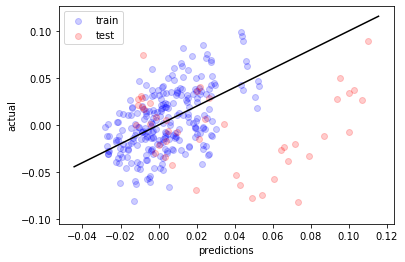

In [41]:
# Scatter the predictions vs the targets with 80% transparency
plt.scatter(train_predictions, train_targets, alpha=0.2, color='b', label='train')
plt.scatter(test_predictions, test_targets, alpha=0.2, color='r', label='test')

# Plot the perfect prediction line
xmin, xmax = plt.xlim()
plt.plot(np.arange(xmin, xmax, 0.01), np.arange(xmin, xmax, 0.01), c='k')

# Set the axis labels and show the plot
plt.xlabel('predictions')
plt.ylabel('actual')
plt.legend()  # show the legend
plt.show()


<a id='item2'></a>

# CHAPTER 2 - Machine learning tree methods

## Feature engineering from volume

We're going to use non-linear models to make more accurate predictions. With linear models, features must be linearly correlated to the target. Other machine learning models can combine features in non-linear ways. For example, what if the price goes up when the moving average of price is going up, and the moving average of volume is going down? The only way to capture those interactions is to either multiply the features, or to use a machine learning algorithm that can handle non-linearity (e.g. random forests).

To incorporate more information that may interact with other features, we can add in weakly-correlated features. First we will add volume data, which we have in the lng_df as the Adj_Volume column.

Before you begin, remember that for TA-Lib functions (such as SMA()), you need to provide Numpy arrays, not pandas objects. You can use the .values attribute of a pandas Series or DataFrame to return it as a Numpy array.

In [42]:
# Create 2 new volume features, 1-day % change and 5-day SMA of the % change
new_features = ['Adj_Volume_1d_change', 'Adj_Volume_1d_change_SMA']
feature_names.extend(new_features)
lng_df['Adj_Volume_1d_change'] = lng_df['Adj_Volume'].pct_change()
lng_df['Adj_Volume_1d_change_SMA'] = talib.SMA(lng_df['Adj_Volume_1d_change'].values,
                        timeperiod=5)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


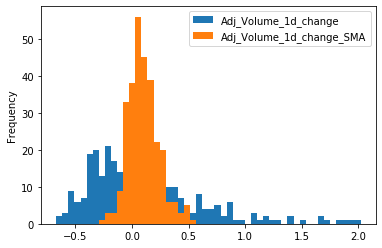

In [43]:
# Plot histogram of volume % change data
lng_df[new_features].plot(kind='hist', sharex=False, bins=50)
plt.show()

In [44]:
lng_df

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Adj_Volume_1d_change,Adj_Volume_1d_change_SMA
Date,,,,,,,,,,,,,,,
2017-01-31,47.65,2137394.0,47.81,0.003358,0.043812,0.950697,62.968946,0.918657,60.655749,0.895731,57.951677,0.839267,53.695377,NaN,NaN
2017-02-01,47.10,2051631.0,48.01,0.019321,-0.023429,0.967486,60.156019,0.932427,59.159791,0.910110,57.041713,0.850150,53.487663,-0.040125,NaN
2017-02-02,49.33,3081369.0,49.19,-0.002838,-0.021618,0.932220,66.659314,0.895486,62.988478,0.873379,59.662227,0.812956,54.209475,0.501912,NaN
2017-02-03,49.43,4158130.0,48.93,-0.010115,0.007336,0.938976,66.920059,0.899461,63.148741,0.875497,59.774509,0.812490,54.241479,0.349442,NaN
2017-02-06,48.50,2090909.0,48.14,-0.007423,0.022129,0.964080,62.059184,0.921608,60.623276,0.895860,58.236185,0.829234,53.889442,-0.497152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,53.06,1907271.0,54.30,0.023370,0.001510,1.004725,46.112898,1.026354,48.423080,1.041368,50.601497,0.922859,52.446487,-0.048011,0.145910
2018-03-28,52.30,1272452.0,56.21,0.074761,-0.033986,1.017058,42.796606,1.038018,46.788195,1.055159,49.525314,0.936544,52.142361,-0.332842,-0.071550
2018-03-29,53.45,2756953.0,54.36,0.017025,0.027489,0.994387,48.797185,1.012735,49.459257,1.031622,51.130119,0.916875,52.560707,1.166646,0.180670


In [45]:
lng_df.index = pd.to_datetime(lng_df.index)

In [46]:
lng_df

,Adj_Close,Adj_Volume,5d_future_close,5d_close_future_pct,5d_close_pct,ma14,rsi14,ma30,rsi30,ma50,rsi50,ma200,rsi200,Adj_Volume_1d_change,Adj_Volume_1d_change_SMA
Date,,,,,,,,,,,,,,,
2017-01-31,47.65,2137394.0,47.81,0.003358,0.043812,0.950697,62.968946,0.918657,60.655749,0.895731,57.951677,0.839267,53.695377,NaN,NaN
2017-02-01,47.10,2051631.0,48.01,0.019321,-0.023429,0.967486,60.156019,0.932427,59.159791,0.910110,57.041713,0.850150,53.487663,-0.040125,NaN
2017-02-02,49.33,3081369.0,49.19,-0.002838,-0.021618,0.932220,66.659314,0.895486,62.988478,0.873379,59.662227,0.812956,54.209475,0.501912,NaN
2017-02-03,49.43,4158130.0,48.93,-0.010115,0.007336,0.938976,66.920059,0.899461,63.148741,0.875497,59.774509,0.812490,54.241479,0.349442,NaN
2017-02-06,48.50,2090909.0,48.14,-0.007423,0.022129,0.964080,62.059184,0.921608,60.623276,0.895860,58.236185,0.829234,53.889442,-0.497152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-27,53.06,1907271.0,54.30,0.023370,0.001510,1.004725,46.112898,1.026354,48.423080,1.041368,50.601497,0.922859,52.446487,-0.048011,0.145910
2018-03-28,52.30,1272452.0,56.21,0.074761,-0.033986,1.017058,42.796606,1.038018,46.788195,1.055159,49.525314,0.936544,52.142361,-0.332842,-0.071550
2018-03-29,53.45,2756953.0,54.36,0.017025,0.027489,0.994387,48.797185,1.012735,49.459257,1.031622,51.130119,0.916875,52.560707,1.166646,0.180670


## Create day-of-week features

We can engineer datetime features to add even more information for our non-linear models. Most financial data has datetimes, which have lots of information in them -- year, month, day, and sometimes hour, minute, and second. But we can also get the day of the week, and things like the quarter of the year, or the elapsed time since some event (e.g. earnings reports).

We are only going to get the day of the week here, since our dataset doesn't go back very far in time. The dayofweek property from the pandas datetime index will help us get the day of the week. Then we will dummy dayofweek with pandas' get_dummies(). This creates columns for each day of the week with binary values (0 or 1). We drop the first column because it can be inferred from the others.

In [47]:
# Use pandas' get_dummies function to get dummies for day of the week
days_of_week = pd.get_dummies(lng_df.index.dayofweek,
                              prefix='weekday',
                              drop_first=True)


In [48]:
# Set the index as the original DataFrame index for merging
days_of_week.index = lng_df.index

In [49]:
# Join the dataframe with the days of week DataFrame
lng_df = pd.concat([lng_df, days_of_week], axis=1)

In [50]:
# Add days of week to feature names
feature_names.extend(['weekday_' + str(i) for i in range(1, 5)])
lng_df.dropna(inplace=True)  # drop missing values in-place
print(lng_df.head())

            Adj_Close  Adj_Volume  5d_future_close  5d_close_future_pct  \
Date                                                                      
2017-02-07      47.81   2522644.0            47.88             0.001464   
2017-02-08      48.01   1521339.0            47.69            -0.006665   
2017-02-09      49.19   1717838.0            46.84            -0.047774   
2017-02-10      48.93   1747989.0            46.71            -0.045371   
2017-02-13      48.14   2321977.0            47.36            -0.016203   

            5d_close_pct      ma14      rsi14      ma30      rsi30      ma50  \
Date                                                                           
2017-02-07      0.003358  0.985448  58.654992  0.939476  58.817869  0.911801   
2017-02-08      0.019321  0.989333  59.351015  0.940047  59.182360  0.911289   
2017-02-09     -0.002838  0.974211  63.278848  0.922383  61.274321  0.893214   
2017-02-10     -0.010115  0.987957  61.860468  0.931821  60.566775  0.9020

## Examine correlations of the new features

Now that we have our volume and datetime features, we want to check the correlations between our new features (stored in the new_features list) and the target (5d_close_future_pct) to see how strongly they are related. Recall pandas has the built-in .corr() method for DataFrames, and seaborn has a nice heatmap() function to show the correlations.

In [51]:
# Add the weekday labels to the new_features list
new_features.extend(['weekday_' + str(i) for i in range(1, 5)])

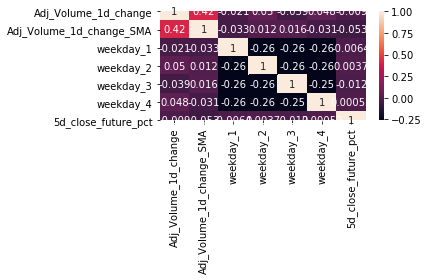

In [52]:
# Plot the correlations between the new features and the targets
sns.heatmap(lng_df[new_features + ['5d_close_future_pct']].corr(), annot=True)
plt.yticks(rotation=0)  # ensure y-axis ticklabels are horizontal
plt.xticks(rotation=90)  # ensure x-axis ticklabels are vertical
plt.tight_layout()
plt.show()

## Fit a decision tree

Random forests are a go-to model for predictions; they work well out of the box. But we'll first learn the building block of random forests -- decision trees.

Decision trees split the data into groups based on the features. Decision trees start with a root node, and split the data down until we reach leaf nodes.

decision tree

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
# Create a decision tree regression model with default arguments
decision_tree = DecisionTreeRegressor()

In [55]:
# Fit the model to the training features and targets
decision_tree.fit(train_features, train_targets)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [56]:
# Check the score on train and test
print(decision_tree.score(train_features, train_targets))
print(decision_tree.score(test_features, test_targets))

0.9999950331816782
-1.3531266939150313


## Try different max depths

We always want to optimize our machine learning models to make the best predictions possible. We can do this by tuning hyperparameters, which are settings for our models. We will see in more detail how these are useful in future chapters, but for now think of them as knobs we can turn to tune our predictions to be as good as possible.

For regular decision trees, probably the most important hyperparameter is max_depth. This limits the number of splits in a decision tree. Let's find the best value of max_depth based on the R2
score of our model on the test set, which we can obtain using the score() method of our decision tree models.

In [57]:
# Loop through a few different max depths and check the performance
for d in [3,5,10]:
    # Create the tree and fit it
    decision_tree = DecisionTreeRegressor(max_depth=d)
    decision_tree.fit(train_features, train_targets)
    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree.score(train_features, train_targets))
    print(decision_tree.score(test_features, test_targets), '\n')

max_depth= 3
0.31221074754988065
-0.34425820543875796 

max_depth= 5
0.5300236519892909
-0.8144742868967225 

max_depth= 10
0.896998296863188
-1.2125046200304856 



## Check our results

Once we have an optimized model, we want to check how it is performing in more detail. We already saw the R2

score, but it can be helpful to see the predictions plotted vs actual values. We can use the .predict() method of our decision tree model to get predictions on the train and test sets.

Ideally, we want to see diagonal lines from the lower left to the upper right. However, due to the simplicity of decisions trees, our model is not going to do well on the test set. But it will do well on the train set.

In [58]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(train_features, train_targets)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [59]:
# Predict values for train and test
train_predictions = decision_tree.predict(train_features)
test_predictions = decision_tree.predict(test_features)

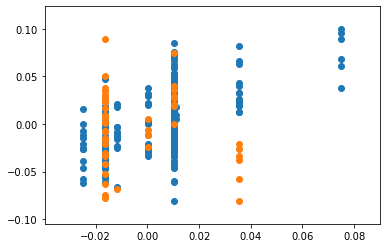

In [60]:
# Scatter the predictions vs actual values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.show()

## Fit a random forest

Data scientists often use random forest models. They perform well out of the box, and have lots of settings to optimize performance. Random forests can be used for classification or regression; we'll use it for regression to predict the future price change of LNG.

We'll create and fit the random forest model similarly to the decision trees using the .fit(features, targets) method. With sklearn's RandomForestRegressor, there's a built-in .score() method we can use to evaluate performance. This takes arguments (features, targets), and returns the R2
score (the coefficient of determination).

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [63]:
# Look at the R^2 scores on train and test
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.9170140979765561
-0.10494642624063344


## Tune random forest hyperparameters

As with all models, we want to optimize performance by tuning hyperparameters. We have many hyperparameters for random forests, but the most important is often the number of features we sample at each split, or max_features in RandomForestRegressor from the sklearn library. For models like random forests that have randomness built-in, we also want to set the random_state. This is set for our results to be reproducible.

Usually, we can use sklearn's GridSearchCV() method to search hyperparameters, but with a financial time series, we don't want to do cross-validation due to data mixing. We want to fit our models on the oldest data and evaluate on the newest data. So we'll use sklearn's ParameterGrid to create combinations of hyperparameters to search.

In [64]:
from sklearn.model_selection import ParameterGrid

In [65]:
# Create a dictionary of hyperparameters to search
grid = {'n_estimators':[200], 'max_depth': [3], 'max_features': [4,8], 'random_state': [42]}
test_scores = []

In [66]:
# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr.set_params(**g)  # ** is "unpacking" the dictionary
    rfr.fit(train_features, train_targets)
    test_scores.append(rfr.score(test_features, test_targets))

In [67]:
# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

0.03463037963408222 {'random_state': 42, 'n_estimators': 200, 'max_features': 4, 'max_depth': 3}


## Evaluate performance

Lastly, and as always, we want to evaluate performance of our best model to check how well or poorly we are doing. Ideally it's best to do back-testing, but that's an involved process we don't have room to cover in this course.

We've already seen the R2
scores, but let's take a look at the scatter plot of predictions vs actual results using matplotlib. Perfect predictions would be a diagonal line from the lower left to the upper right.

In [68]:
# Use the best hyperparameters from before to fit a random forest model
rfr = RandomForestRegressor(n_estimators=200, max_depth=3, max_features=4, random_state=42)
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [69]:
# Make predictions with our model
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

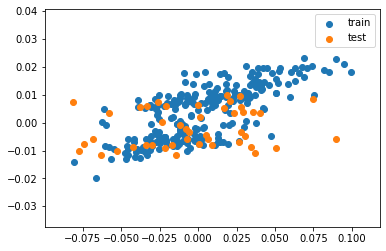

In [70]:
# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.legend()
plt.show()

## Random forest feature importances

One useful aspect of tree-based methods is the ability to extract feature importances. This is a quantitative way to measure how much each feature contributes to our predictions. It can help us focus on our best features, possibly enhancing or tuning them, and can also help us get rid of useless features that may be cluttering up our model.

Tree models in sklearn have a .feature_importances_ property that's accessible after fitting the model. This stores the feature importance scores. We need to get the indices of the sorted feature importances using np.argsort() in order to make a nice-looking bar plot of feature importances (sorted from greatest to least importance).

In [71]:
# Get feature importances from our random forest model
importances = rfr.feature_importances_

In [72]:
# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

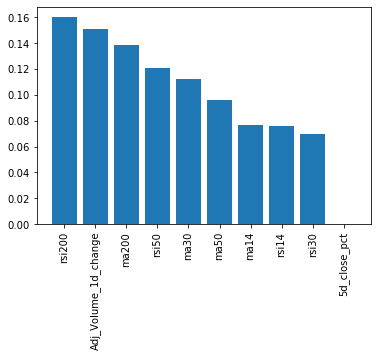

In [73]:
# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)
# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.show()

## A gradient boosting model

Now we'll fit a gradient boosting (GB) model. It's been said a linear model is like a Toyota Camry, and GB is like a Black Hawk helicopter. GB has potential to outperform random forests, but doesn't always do so. This is called the no free lunch theorem, meaning we should always try lots of different models for each problem.

GB is similar to random forest models, but the difference is that trees are built successively. With each iteration, the next tree fits the residual errors from the previous tree in order to improve the fit.

For now we won't search our hyperparameters -- they've been searched for you.

In [74]:
from sklearn.ensemble import GradientBoostingRegressor

In [75]:
# Create GB model -- hyperparameters have already been searched for you
gbr = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
gbr.fit(train_features,train_targets)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=4,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=0.6, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [76]:
print(gbr.score(train_features, train_targets))
print(gbr.score(test_features, test_targets))

0.4412629798604665
0.009669282780346067


## Gradient boosting feature importances

As with random forests, we can extract feature importances from gradient boosting models to understand which features are the best predictors. Sometimes it's nice to try different tree-based models and look at the feature importances from all of them. This can help average out any peculiarities that may arise from one particular model.

The feature importances are stored as a numpy array in the .feature_importances_ property of the gradient boosting model. We'll need to get the sorted indices of the feature importances, using np.argsort(), in order to make a nice plot. We want the features from largest to smallest, so we will use Python's indexing to reverse the sorted importances like feat_importances[::-1].

In [77]:
# Extract feature importances from the fitted gradient boosting model
feature_importances = gbr.feature_importances_

In [78]:
feature_importances

array([0.        , 0.08660836, 0.09784382, 0.10204457, 0.0942192 ,
       0.08197533, 0.11431695, 0.13708378, 0.13766228, 0.14824571])

In [79]:
# Get the indices of the largest to smallest feature importances
sorted_index = np.argsort(feature_importances)[:-1]
x = range(features.shape[1])

In [80]:
features.shape

(295, 9)

In [81]:
sorted_index

array([0, 5, 1, 4, 2, 3, 6, 7, 8])

In [82]:
# Create tick labels 
labels = np.array(feature_names)[sorted_index]

In [83]:
labels

array(['5d_close_pct', 'ma50', 'ma14', 'rsi30', 'rsi14', 'ma30', 'rsi50',
       'ma200', 'rsi200'], dtype='<U24')

In [84]:
x

range(0, 9)

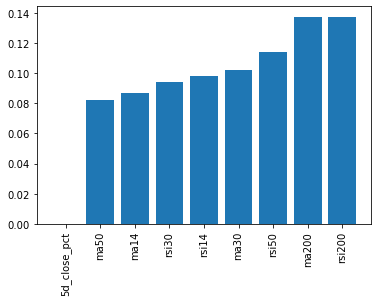

In [85]:
plt.bar(x, feature_importances[sorted_index], tick_label=labels)
# Set the tick lables to be the feature names, according to the sorted feature_idx
plt.xticks(rotation=90)
plt.show()

<a id='item3'></a>

# Chapter 3 - Neural networks and KNN

## Standardizing data

In [86]:
from sklearn.preprocessing import scale

In [87]:
# Remove unimportant features (weekdays)
train_features = train_features.iloc[:, :-4]
test_features = test_features.iloc[:, :-4]


In [88]:
# Standardize the train and test features
scaled_train_features = scale(train_features)
scaled_test_features = scale(test_features)

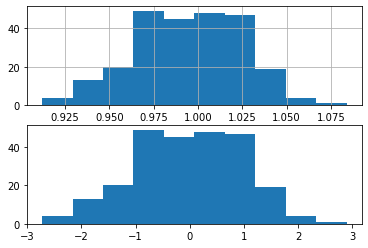

In [89]:
# Plot histograms of the 14-day SMA RSI before and after scaling
f, ax = plt.subplots(nrows=2, ncols=1)
train_features.iloc[:, 2].hist(ax=ax[0])
ax[1].hist(scaled_train_features[:, 2])
plt.show()

## Optimize n_neighbors

In [90]:
from sklearn.neighbors import KNeighborsRegressor

In [91]:
for n in range(2, 13):
    # Create and fit the KNN model
    knn = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    knn.fit(scaled_train_features, train_targets)
    
    # Print number of neighbors and the score to find the best value of n
    print("n_neighbors =", n)
    print('train, test scores')
    print(knn.score(scaled_train_features, train_targets))
    print(knn.score(scaled_test_features, test_targets))
    print()  # prints a blank line

n_neighbors = 2
train, test scores
0.7399807954377584
-0.2740672226942691

n_neighbors = 3
train, test scores
0.5824623875084005
-0.1181802758587529

n_neighbors = 4
train, test scores
0.46535493280420653
-0.15112267167378457

n_neighbors = 5
train, test scores
0.40037988429002047
-0.09383063949462533

n_neighbors = 6
train, test scores
0.3356478081872952
-0.034500892715922715

n_neighbors = 7
train, test scores
0.29425581102769294
0.005022709061472175

n_neighbors = 8
train, test scores
0.2847234128033601
3.995633668785192e-05

n_neighbors = 9
train, test scores
0.2690193196709867
0.012443040356902357

n_neighbors = 10
train, test scores
0.26768882984746856
0.0218643652727748

n_neighbors = 11
train, test scores
0.2420615649564759
0.005342723766639912

n_neighbors = 12
train, test scores
0.21366040665719777
-0.010402295557673469



## Evaluate KNN performance

In [92]:
# Create the model with the best-performing n_neighbors of 5
knn = KNeighborsRegressor(n_neighbors=5)

In [93]:
# Fit the model
knn.fit(scaled_train_features, train_targets)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [94]:
# Get predictions for train and test sets
train_predictions = knn.predict(scaled_train_features)
test_predictions = knn.predict(scaled_test_features)

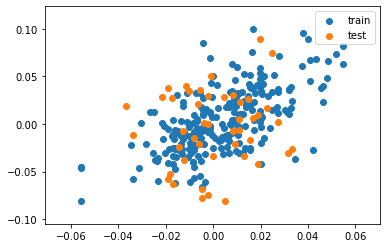

In [95]:
# Plot the actual vs predicted values
plt.scatter(train_predictions, train_targets, label='train')
plt.scatter(test_predictions, test_targets, label='test')
plt.legend()
plt.show()

## Build and fit a simple neural net

In [96]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [97]:
# Create the model
model_1 = Sequential()
model_1.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_1.add(Dense(20, activation='relu'))
model_1.add(Dense(1, activation='linear'))

In [98]:
# Fit the model
model_1.compile(optimizer='adam', loss='mse')
history = model_1.fit(scaled_train_features, train_targets, epochs=25)

Epoch 1/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0787
Epoch 2/25
250/250 [==============================] - 0s 476us/step - loss: 0.0122
Epoch 3/25
250/250 [==============================] - 0s 396us/step - loss: 0.0108
Epoch 4/25
250/250 [==============================] - 0s 405us/step - loss: 0.0050
Epoch 5/25
250/250 [==============================] - 0s 414us/step - loss: 0.0019
Epoch 6/25
250/250 [==============================] - 0s 385us/step - loss: 0.0020
Epoch 7/25
250/250 [==============================] - 0s 477us/step - loss: 0.0014 0s - loss: 0.001
Epoch 8/25
250/250 [==============================] - 0s 406us/step - loss: 0.0013
Epoch 9/25
250/250 [==============================] - 0s 424us/step - loss: 0.0012
Epoch 10/25
250/250 [==============================] - 0s 390us/step - loss: 0.0011
Epoch 11/25
250/250 [==============================] - 0s 460us/step - loss: 0.0011
Epoch 12/25
250/250 [==============================] - 0s 318us/step -

## Plot losses

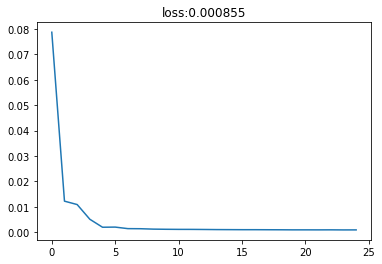

In [99]:
# Plot the losses from the fit
plt.plot(history.history['loss'])

# Use the last loss as the title
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

## Measure performance

In [100]:
from sklearn.metrics import r2_score

# Calculate R^2 score
train_preds = model_1.predict(scaled_train_features)
test_preds = model_1.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))



0.25772445529305
-0.0870455107221153


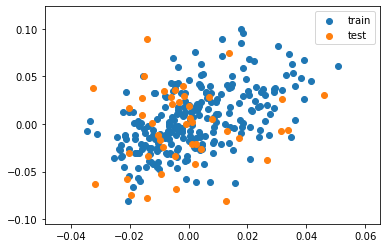

In [101]:
# Plot predictions vs actual
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend()
plt.show()

## Custom loss function

In [102]:
import keras.losses
import tensorflow as tf

In [103]:
# Create loss function
def sign_penalty(y_true, y_pred):
    penalty = 100.
    loss = tf.where(tf.less(y_true * y_pred, 0), \
                     penalty * tf.square(y_true - y_pred), \
                     tf.square(y_true - y_pred))

    return tf.reduce_mean(loss, axis=-1)

In [104]:
sign_penalty

<function __main__.sign_penalty(y_true, y_pred)>

In [105]:
keras.losses.sign_penalty = sign_penalty  # enable use of loss with keras
print(keras.losses.sign_penalty)

<function sign_penalty at 0x7f74040d80d0>


In [106]:
keras.losses.sign_penalty

<function __main__.sign_penalty(y_true, y_pred)>

## Fit neural net with custom loss function

Epoch 1/25
250/250 [==============================] - 1s 3ms/step - loss: 1.5838
Epoch 2/25
250/250 [==============================] - 0s 397us/step - loss: 0.6706
Epoch 3/25
250/250 [==============================] - 0s 397us/step - loss: 0.2907
Epoch 4/25
250/250 [==============================] - 0s 392us/step - loss: 0.2148
Epoch 5/25
250/250 [==============================] - 0s 406us/step - loss: 0.1423 0s - loss: 0.137
Epoch 6/25
250/250 [==============================] - 0s 408us/step - loss: 0.1148
Epoch 7/25
250/250 [==============================] - 0s 475us/step - loss: 0.0953
Epoch 8/25
250/250 [==============================] - 0s 468us/step - loss: 0.0909
Epoch 9/25
250/250 [==============================] - 0s 406us/step - loss: 0.0832
Epoch 10/25
250/250 [==============================] - 0s 469us/step - loss: 0.0679
Epoch 11/25
250/250 [==============================] - 0s 475us/step - loss: 0.0438
Epoch 12/25
250/250 [==============================] - 0s 471us/step -

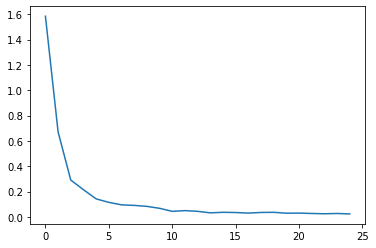

In [107]:
# Create the model
model_2 = Sequential()
model_2.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_2.add(Dense(20, activation='relu'))
model_2.add(Dense(1, activation='linear'))

# Fit the model with our custom 'sign_penalty' loss function
model_2.compile(optimizer='adam', loss=sign_penalty)
history = model_2.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])

In [108]:
# Evaluate R^2 scores
train_preds = model_2.predict(scaled_train_features)
test_preds = model_2.predict(scaled_test_features)
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

0.2066026131419223
0.02727540601436773


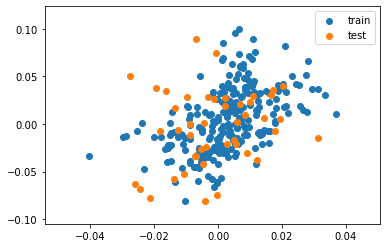

In [109]:
# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')  # plot test set
plt.legend(); plt.show()

## Combatting overfitting with dropout

In [110]:
from keras.layers import Dropout

In [111]:
# Create model with dropout
model_3 = Sequential()
model_3.add(Dense(100, input_dim=scaled_train_features.shape[1], activation='relu'))
model_3.add(Dropout(0.2))
model_3.add(Dense(20, activation='relu'))
model_3.add(Dense(1, activation='linear'))

Epoch 1/25
250/250 [==============================] - 1s 2ms/step - loss: 0.0470
Epoch 2/25
250/250 [==============================] - 0s 482us/step - loss: 0.0210
Epoch 3/25
250/250 [==============================] - 0s 410us/step - loss: 0.0172
Epoch 4/25
250/250 [==============================] - 0s 471us/step - loss: 0.0178
Epoch 5/25
250/250 [==============================] - 0s 413us/step - loss: 0.0154
Epoch 6/25
250/250 [==============================] - 0s 469us/step - loss: 0.0113
Epoch 7/25
250/250 [==============================] - 0s 406us/step - loss: 0.0087
Epoch 8/25
250/250 [==============================] - 0s 404us/step - loss: 0.0094
Epoch 9/25
250/250 [==============================] - 0s 405us/step - loss: 0.0067
Epoch 10/25
250/250 [==============================] - 0s 555us/step - loss: 0.0078
Epoch 11/25
250/250 [==============================] - 0s 557us/step - loss: 0.0051
Epoch 12/25
250/250 [==============================] - 0s 481us/step - loss: 0.0069
Epo

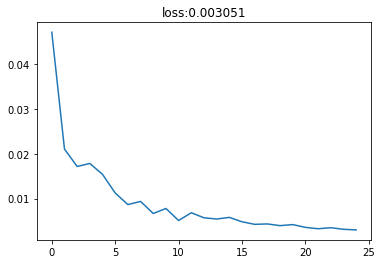

In [112]:
# Fit model with mean squared error loss function
model_3.compile(optimizer='adam', loss='mse')
history = model_3.fit(scaled_train_features, train_targets, epochs=25)
plt.plot(history.history['loss'])
plt.title('loss:' + str(round(history.history['loss'][-1], 6)))
plt.show()

## Ensembling models

In [113]:
# Make predictions from the 3 neural net models
train_pred1 = model_1.predict(scaled_train_features)
test_pred1 = model_1.predict(scaled_test_features)

train_pred2 = model_2.predict(scaled_train_features)
test_pred2 = model_2.predict(scaled_test_features)

train_pred3 = model_3.predict(scaled_train_features)
test_pred3 = model_3.predict(scaled_test_features)

# Horizontally stack predictions and take the average across rows
train_preds = np.mean(np.hstack((train_pred1, train_pred2, train_pred3)), axis=1)
test_preds = np.mean(np.hstack((test_pred1, test_pred2, test_pred3)), axis=1)
print(test_preds[-5:])

[ 0.00440995  0.00801625 -0.01451259  0.00101717  0.01400381]


## See how the ensemble performed

In [114]:
from sklearn.metrics import r2_score

In [115]:
# Evaluate the R^2 scores
print(r2_score(train_targets, train_preds))
print(r2_score(test_targets, test_preds))

0.20860940695101193
0.07438779283257035


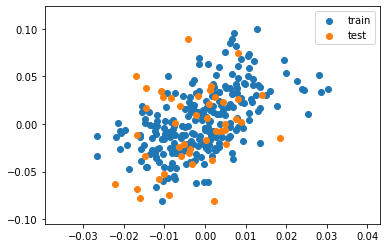

In [116]:
# Scatter the predictions vs actual -- this one is interesting!
plt.scatter(train_preds, train_targets, label='train')
plt.scatter(test_preds, test_targets, label='test')
plt.legend(); plt.show()

<a id='item3'></a>

# Chapter 4 - Modern portfolio theory (MPT); efficient frontiers

## Join stock DataFrames and calculate returns

Our first step towards calculating modern portfolio theory (MPT) portfolios is to get daily and monthly returns. Eventually we're going to get the best portfolios of each month based on the Sharpe ratio. The easiest way to do this is to put all our stock prices into one DataFrame, then to resample them to the daily and monthly time frames. We need daiy price changes to calculate volatility, which we will use as our measure of risk.

In [117]:
smlv = pd.read_csv("SMLV.csv", usecols=["Date", "Adj_Close"], parse_dates=["Date"], index_col=0)
smlv_df = smlv['2013-02-21':'2018-05-31']
smlv_df

,Adj_Close
Date,
2013-02-21,49.482507
2013-02-22,49.881225
2013-02-25,49.440974
2013-02-26,49.200082
2013-02-27,49.424361
...,...
2018-05-24,92.934000
2018-05-25,93.093800
2018-05-29,93.190000


In [118]:
lng = pd.read_csv("LNG.csv", usecols=["Date", "Adj_Close"], index_col=0, parse_dates=["Date"])
lng_df = lng['1994-04-04':'2018-05-31']
lng_df

,Adj_Close
Date,
1994-04-04,72.00
1994-04-05,108.00
1994-04-06,108.00
1994-04-07,108.00
1994-04-08,108.00
...,...
2018-05-24,61.67
2018-05-25,62.16
2018-05-29,63.31


In [119]:
spy = pd.read_csv("SPY_ch4.csv", usecols=["Date", "Adj_Close"], index_col=0, parse_dates=["Date"])
spy

,Adj_Close
Date,
1993-01-29,27.356758
1993-02-01,27.551329
1993-02-02,27.609670
1993-02-03,27.901558
1993-02-04,28.018301
...,...
2018-05-24,272.800000
2018-05-25,272.150000
2018-05-29,269.020000


In [120]:
spy_df = spy['1993-01-29':'2018-05-31']
spy_df

,Adj_Close
Date,
1993-01-29,27.356758
1993-02-01,27.551329
1993-02-02,27.609670
1993-02-03,27.901558
1993-02-04,28.018301
...,...
2018-05-24,272.800000
2018-05-25,272.150000
2018-05-29,269.020000


In [121]:
# Join 3 stock dataframes together
full_df = pd.concat([lng_df, spy_df, smlv_df], axis=1).dropna()
full_df

,Adj_Close,Adj_Close,Adj_Close
Date,,,
2013-02-21,20.21,135.507156,49.482507
2013-02-22,20.99,136.831419,49.881225
2013-02-25,20.44,134.227938,49.440974
2013-02-26,21.15,135.146818,49.200082
2013-02-27,21.57,136.849441,49.424361
...,...,...,...
2018-05-24,61.67,272.800000,92.934000
2018-05-25,62.16,272.150000,93.093800
2018-05-29,63.31,269.020000,93.190000


In [122]:
full_df.columns = ['LNG', 'SPY', 'SMLV']
full_df.head()

,LNG,SPY,SMLV
Date,,,
2013-02-21,20.21,135.507156,49.482507
2013-02-22,20.99,136.831419,49.881225
2013-02-25,20.44,134.227938,49.440974
2013-02-26,21.15,135.146818,49.200082
2013-02-27,21.57,136.849441,49.424361


In [123]:
# Resample the full dataframe to monthly timeframe
monthly_df = full_df.resample('BMS').first()

In [124]:
monthly_df

,LNG,SPY,SMLV
Date,,,
2013-02-01,20.21,135.507156,49.482507
2013-03-01,21.16,137.029610,49.507427
2013-04-01,27.94,141.205073,51.366077
2013-05-01,27.89,143.222931,51.607545
2013-06-03,29.24,148.715503,52.648355
...,...,...,...
2018-01-01,54.70,267.699223,91.135411
2018-02-01,57.86,280.458188,90.787034
2018-03-01,51.88,266.633486,86.417392


In [125]:
# Calculate daily returns of stocks
returns_daily = full_df.pct_change()
returns_daily

,LNG,SPY,SMLV
Date,,,
2013-02-21,NaN,NaN,NaN
2013-02-22,0.038595,0.009773,0.008058
2013-02-25,-0.026203,-0.019027,-0.008826
2013-02-26,0.034736,0.006846,-0.004872
2013-02-27,0.019858,0.012598,0.004559
...,...,...,...
2018-05-24,-0.019087,-0.002049,0.002092
2018-05-25,0.007946,-0.002383,0.001719
2018-05-29,0.018501,-0.011501,0.001033


In [126]:
# Calculate monthly returns of the stocks
returns_monthly = monthly_df.pct_change().dropna()
returns_monthly

,LNG,SPY,SMLV
Date,,,
2013-03-01,0.047006,0.011235,0.000504
2013-04-01,0.320416,0.030471,0.037543
2013-05-01,-0.001790,0.014290,0.004701
2013-06-03,0.048404,0.038350,0.020168
2013-07-01,-0.014022,-0.013014,-0.003289
...,...,...,...
2018-01-01,0.128300,0.021450,-0.010725
2018-02-01,0.057770,0.047662,-0.003823
2018-03-01,-0.103353,-0.049293,-0.048131


In [127]:
print(returns_monthly.tail())

                 LNG       SPY      SMLV
Date                                    
2018-01-01  0.128300  0.021450 -0.010725
2018-02-01  0.057770  0.047662 -0.003823
2018-03-01 -0.103353 -0.049293 -0.048131
2018-04-02  0.021396 -0.034367  0.009406
2018-05-01  0.108322  0.029168  0.027469


## Calculate covariances for volatility

In MPT, we quantify risk via volatility. The math for calculating portfolio volatility is complex, and it requires daily returns covariances. We'll now loop through each month in the returns_monthly DataFrame, and calculate the covariance of the daily returns.

With pandas datetime indices, we can access the month and year with df.index.month and df.index.year. We'll use this to create a mask for returns_daily that gives us the daily returns for the current month and year in the loop. We then use the mask to subset the DataFrame like this: df[mask]. This gets entries in the returns_daily DataFrame which are in the current month and year in each cycle of the loop. Finally, we'll use pandas' .cov() method to get the covariance of daily returns.

In [128]:
# Daily covariance of stocks (for each monthly period)
covariances = {}
rtd_idx = returns_daily.index
for i in returns_monthly.index:    
    # Mask daily returns for each month and year, and calculate covariance
    mask = (rtd_idx.month == i.month) & (rtd_idx.year == i.year)
    
    # Use the mask to get daily returns for the current month and year of monthy returns index
    covariances[i] = returns_daily[mask].cov()

print(covariances[i])

           LNG       SPY      SMLV
LNG   0.000376  0.000057  0.000060
SPY   0.000057  0.000043  0.000023
SMLV  0.000060  0.000023  0.000025


## Calculate portfolios

We'll now generate portfolios to find each month's best one. numpy's random.random() generates random numbers from a uniform distribution, then we normalize them so they sum to 1 using the /= operator. We use these weights to calculate returns and volatility. Returns are sums of weights times individual returns. Volatility is more complex, and involves the covariances of the different stocks.

Finally we'll store the values in dictionaries for later use, with months' dates as keys.

In this case, we will only generate 10 portfolios for each date so the code will run faster, but in a real-world use-case you'd want to use more like 1000 to 5000 randomly-generated portfolios for a few stocks.

In [129]:
portfolio_returns, portfolio_volatility, portfolio_weights = {}, {}, {}

In [130]:
# Get portfolio performances at each month
for date in sorted(covariances.keys()):
    cov = covariances[date]
    for portfolio in range(10):
        weights = np.random.random(3)
        weights /= np.sum(weights) # /= divides weights by their sum to normalize
        
        returns = np.dot(weights, returns_monthly.loc[date])
        volatility = np.sqrt(np.dot(weights.T, np.dot(cov, weights)))
        
        portfolio_returns.setdefault(date, []).append(returns)
        portfolio_volatility.setdefault(date, []).append(volatility)
        portfolio_weights.setdefault(date, []).append(weights)
        
print(portfolio_weights[date][0])

[0.17984413 0.17552742 0.64462845]


## Plot efficient frontier

We can finally plot the results of our MPT portfolios, which shows the "efficient frontier". This is a plot of the volatility vs the returns. This can help us visualize our risk-return possibilities for portfolios. The upper left boundary of the points is the best we can do (highest return for a given risk), and that is the efficient frontier.

To create this plot, we will use the latest date in our covariances dictionary which we created a few exercises ago. This has dates as keys, so we'll get the sorted keys using sorted() and .keys(), then get the last entry with Python indexing ([-1]). Lastly we'll use matplotlib to scatter variance vs returns and see the efficient frontier for the latest date in the data.

In [131]:
# Get latest date of available data
date = sorted(covariances.keys())[-1]

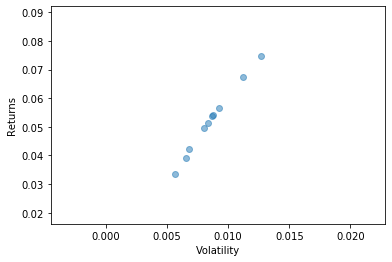

In [132]:
# Plot efficient frontier
# warning: this can take at least 10s for the plot to execute...
plt.scatter(x=portfolio_volatility[date], y=portfolio_returns[date], alpha=0.5)
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

## Get best Sharpe ratios

We need to find the "ideal" portfolios for each date so we can use them as targets for machine learning. We'll loop through each date in portfolio_returns, then loop through the portfolios we generated with portfolio_returns[date]. We'll then calculate the Sharpe ratio, which is the return divided by volatility (assuming a no-risk return of 0).

We use enumerate() to loop through the returns for the current date (portfolio_returns[date]) and keep track of the index with i. Then we use the current date and current index to get the volatility of each portfolio with portfolio_volatility[date][i]. Finally, we get the index of the best Sharpe ratio for each date using np.argmax(). We'll use this index to get the ideal portfolio weights soon.

In [133]:
# Empty dictionaries for sharpe ratios and best sharpe indexes by date
sharpe_ratio, max_sharpe_idxs = {}, {}

In [134]:
ret=0.018302690931460502

In [135]:
# Loop through dates and get sharpe ratio for each portfolio
for date in portfolio_returns.keys():
    for i, ret in enumerate(portfolio_returns[date]):
    
     # Divide returns by the volatility for the date and index, i
        sharpe_ratio.setdefault(date, []).append(ret / portfolio_volatility[date][i])

    # Get the index of the best sharpe ratio for each date
    max_sharpe_idxs[date] = np.argmax(sharpe_ratio[date])

print(portfolio_returns[date][max_sharpe_idxs[date]])

0.04230810044956541


## Calculate EWMAs

We will now work towards creating some features to be able to predict our ideal portfolios. We will simply use the price movement as a feature for now. To do this we will create a daily exponentially-weighted moving average (EWMA), then resample that to the monthly timeframe. Finally, we'll shift the monthly moving average of price one month in the future, so we can use it as a feature for predicting future portfolios.

In [136]:
# Calculate exponentially-weighted moving average of daily returns
ewma_daily = returns_daily.ewm(span=30).mean()

In [137]:
# Resample daily returns to first business day of the month with the first day for that month
ewma_monthly = ewma_daily.resample('BMS').first()

In [138]:
# Shift ewma for the month by 1 month forward so we can use it as a feature for future predictions 
ewma_monthly = ewma_monthly.shift(1).dropna()

In [139]:
print(ewma_monthly.iloc[-1])

LNG    -0.000751
SPY    -0.002635
SMLV   -0.001181
Name: 2018-05-01 00:00:00, dtype: float64


## Make features and targets

To use machine learning to pick the best portfolio, we need to generate features and targets. Our features were just created in the last exercise – the exponentially weighted moving averages of prices. Our targets will be the best portfolios we found from the highest Sharpe ratio.

We will use pandas' .iterrows() method to get the index, value pairs for the ewma_monthly DataFrame. We'll set the current value of ewma_monthly in the loop to be our features. Then we'll use the index of the best Sharpe ratio (from max_sharpe_idxs) to get the best portfolio_weights for each month and set that as a target.

In [140]:
targets, features = [], []

# Create features from price history and targets as ideal portfolio
for date, ewma in ewma_monthly.iterrows():
    # Get the index of the best sharpe ratio
    best_idx = max_sharpe_idxs[date]
    targets.append(portfolio_weights[date][best_idx])
    features.append(ewma)  # add ewma to features
targets = np.array(targets)
features = np.array(features)
print(targets[-5:])

[[0.63851291 0.33999663 0.02149046]
 [0.46551428 0.47885594 0.05562978]
 [0.02074726 0.71210514 0.2671476 ]
 [0.44031363 0.03769443 0.52199195]
 [0.17984413 0.17552742 0.64462845]]


## Plot efficient frontier with best Sharpe ratio

# Let's now plot the efficient frontier again, but add a marker for the portfolio with the best Sharpe index. Visualizing our data is always a good idea to better understand it.

Recall the efficient frontier is plotted in a scatter plot of portfolio volatility on the x-axis, and portfolio returns on the y-axis. We'll get the latest date we have in our data from covariances.keys(), although any of the portfolio_returns, etc, dictionaries could be used as well to get the date. Then we get volatilities and returns for the latest date we have from our portfolio_volatility and portfolio_returns. Finally we get the index of the portfolio with the best Sharpe index from max_sharpe_idxs[date], and plot everything with plt.scatter().

In [141]:
# Get most recent (current) returns and volatility
date = sorted(covariances.keys())[-1]
cur_returns = portfolio_returns[date]
cur_volatility = portfolio_volatility[date]

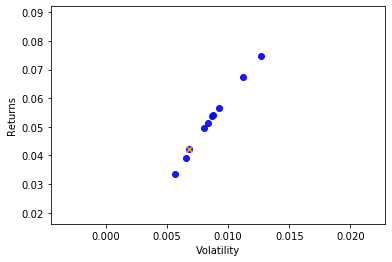

In [142]:
# Plot efficient frontier with sharpe as point
plt.scatter(x=cur_volatility, y=cur_returns, alpha=0.9, color='blue')
best_idx = max_sharpe_idxs[date]
# Place an orange "X" on the point with the best Sharpe ratio
plt.scatter(x=cur_volatility[best_idx], y=cur_returns[best_idx], marker='x', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.show()

## Make predictions with a random forest

In order to fit a machine learning model to predict ideal portfolios, we need to create train and test sets for evaluating performance. We will do this as we did in previous chapters, where we take our features and targets arrays, and split them based on a train_size we set. Often the train size may be around 70-90% of our data.

We then fit our model (a random forest in this case) to the training data, and evaluate the R2
scores on train and test using .score() from our model. In this case, the hyperparameters have been set for you, but usually you'd want to do a search with ParameterGrid like we did in previous chapters.

In [143]:
# Make train and test features
train_size = int(0.85 * features.shape[0])
train_features = features[:train_size]
test_features = features[train_size:]
train_targets = targets[:train_size]
test_targets = targets[train_size:]

In [144]:
# Fit the model and check scores on train and test
rfr = RandomForestRegressor(n_estimators=300, random_state=42)
rfr.fit(train_features, train_targets)
print(rfr.score(train_features, train_targets))
print(rfr.score(test_features, test_targets))

0.836881991908324
-0.13207842021556157


## Get predictions and first evaluation

Now that we have a trained random forest model (rfr), we want to use it to get predictions on the test set. We do this to evaluate our model's performance – at a basic level, is it doing as well or better than just buying the index, SPY?

We'll use the typical sklearn .predict(features) method, then multiply our monthly returns by our portfolio predictions. We sum these up with np.sum() since this will have 3 rows for each month. Then we plot both the monthly returns from our predictions, as well as SPY and compare the two.

In [145]:
# Get predictions from model on train and test
train_predictions = rfr.predict(train_features)
test_predictions = rfr.predict(test_features)

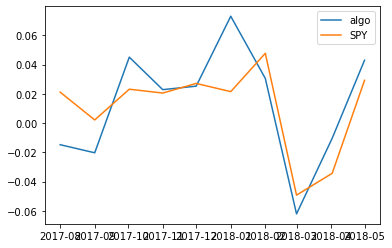

In [146]:
# Calculate and plot returns from our RF predictions and the SPY returns
test_returns = np.sum(returns_monthly.iloc[train_size:] * test_predictions, axis=1)
plt.plot(test_returns, label='algo')
plt.plot(returns_monthly['SPY'].iloc[train_size:], label='SPY')
plt.legend()
plt.show()

## Evaluate returns

Let's now see how our portfolio selection would perform as compared with just investing in the SPY. We'll do this to see if our predictions are promising, despite the low R2

value.

We will set a starting value for our investment of $1000, then loop through the returns from our predictions as well as from SPY. We'll use the monthly returns from our portfolio selection and SPY and apply them to our starting cash balance. From this we will get a month-by-month picture of how our investment is doing, and we can see how our predictions did overall vs the SPY. Next, we can plot our portfolio from our predictions and compare it to SPY.

In [147]:
# Calculate the effect of our portfolio selection on a hypothetical $1k investment
cash = 1000
algo_cash, spy_cash = [cash], [cash]  # set equal starting cash amounts
for r in test_returns:
    cash *= 1 + r
    algo_cash.append(cash)

In [148]:
# Calculate performance for SPY
cash = 1000  # reset cash amount
for r in returns_monthly['SPY'].iloc[train_size:]:
    cash *= 1 + r
    spy_cash.append(cash)

print('algo returns:', (algo_cash[-1] - algo_cash[0]) / algo_cash[0])
print('SPY returns:', (spy_cash[-1] - spy_cash[0]) / spy_cash[0])

algo returns: 0.13193302795106093
SPY returns: 0.10942393838171188


## Plot returns

Lastly, we'll plot the performance of our machine-learning-generated portfolio versus just holding the SPY. We can use this as an evaluation to see if our predictions are doing well or not.

Since we already have algo_cash and spy_cash created, all we need to do is provide them to plt.plot() to display. We'll also set the label for the datasets with legend in plt.plot().

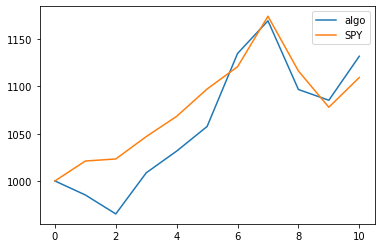

In [149]:
# Plot the algo_cash and spy_cash to compare overall returns
plt.plot(algo_cash, label='algo')
plt.plot(spy_cash, label='SPY')
plt.legend()  # show the legend
plt.show()

# THE END